In [12]:
options(java.parameters = "-Xmx32g") 
library(rJava)
.jinit()

[1] 0

In [13]:
# Cargar librerías
library(loadeR)
library(transformeR)
library(visualizeR)

In [14]:
df <- read.csv("data_inventory.csv")
head(df)

dataset                      type         access  source            provider
1 AEMET-5KM-regular_Iberia_day observations opendap AEMET-5KM-regular         
2 CHELSA-W5E5v1.0_Canarias_day observations opendap CHELSA-W5E5v1.0           
3 CHELSA-W5E5v1.0_Iberia_day   observations opendap CHELSA-W5E5v1.0           
4 PTI-grid-v0_Canarias_day     observations opendap PTI-grid-v0               
5 PTI-grid-v0_Iberia_day       observations opendap PTI-grid-v0               
6 PTI-grid-v1_Canarias_day     observations opendap PTI-grid-v1               
  experiment frequency
1            day      
2            day      
3            day      
4            day      
5            day      
6            day      
  endpoint                                                                                                                               
1 https://hub.climate4r.ifca.es/thredds/dodsC/pti-clima/ncmls/OBSERVATIONS/AEMET-5KM-regular/Iberia/day/AEMET-5KM-regular_Iberia_day.ncml
2 https://hub.climate4r.ifca.es/thredds/dodsC/pti-clima/ncmls/OBSERVATIONS/CHELSA-W5E5v1.0/Canarias/day/CHELSA-W5E5v1.0_Canarias_day.ncml
3 https://hub.climate4r.ifca.es/thredds/dodsC/pti-clima/ncmls/OBSERVATIONS/CHELSA-W5E5v1.0/Iberia/day/CHELSA-W5E5v1.0_Iberia_day.ncml    
4 https://hub.climate4r.ifca.es/thredds/dodsC/pti-clima/ncmls/OBSERVATIONS/PTI-grid-v0/Canarias/day/PTI-grid-v0_Canarias_day.ncml        
5 https://hub.climate4r.ifca.es/thredds/dodsC/pti-clima/ncmls/OBSERVATIONS/PTI-grid-v0/Iberia/day/PTI-grid-v0_Iberia_day.ncml            
6 https://hub.climate4r.ifca.es/thredds/dodsC/pti-clima/ncmls/OBSERVATIONS/PTI-grid-v1/Canarias/day/PTI-grid-v1_Canarias_day.ncml        
  dictionary                                            
1 ../../Harmonization_dictionaries/AEMET-5KM-regular.dic
2 ../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic  
3 ../../Harmonization_dictionaries/CHELSA-W5E5v1.0.dic  
4 ../../Harmonization_dictionaries/PTI-grid-v0.dic      
5 ../../Harmonization_dictionaries/PTI-grid-v0.dic      
6 ../../Harmonization_dictionaries/PTI-grid-v1.dic

In [15]:
subset.pi <- subset(df, dataset == "ERA5-Land_Iberia_day")
lon.pi <- as.character(subset.pi$endpoint)
str(dataInventory(lon.pi))

[2025-11-14 09:40:19] Doing inventory ...

[2025-11-14 09:40:19] Opening dataset...

[2025-11-14 09:40:19] The dataset was successfuly opened

[2025-11-14 09:40:20] Retrieving info for 'sp' (5 vars remaining)

[2025-11-14 09:40:20] Retrieving info for 'tp' (4 vars remaining)

[2025-11-14 09:40:20] Retrieving info for 't2mx' (3 vars remaining)

[2025-11-14 09:40:20] Retrieving info for 'sfcwind' (2 vars remaining)

[2025-11-14 09:40:20] Retrieving info for 't2m' (1 vars remaining)

[2025-11-14 09:40:20] Retrieving info for 't2mn' (0 vars remaining)

[2025-11-14 09:40:20] Done.



List of 6
 $ sp     :List of 7
  ..$ Description: chr "Surface pressure"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:3] 26298 101 161
  ..$ Units      : chr "Pa"
  ..$ DataSizeMb : num 1711
  ..$ Version    : logi NA
  ..$ Dimensions :List of 3
  .. ..$ time     :List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "1.0 days"
  .. .. ..$ Units     : chr "days since 1950-01-01 00:00:00"
  .. .. ..$ Date_range: chr "1950-01-01T00:00:00Z - 2021-12-31T00:00:00Z"
  .. ..$ latitude :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:101] 44 43.9 43.8 43.7 43.6 ...
  .. .. ..$ Shape      : int 101
  .. .. ..$ Coordinates: chr "latitude"
  .. ..$ longitude:List of 5
  .. .. ..$ Type       : chr "Lon"
  .. .. ..$ Units      : chr "degrees_east"
  .. .. ..$ Values     : num [1:161] -10 -9.9 -9.8 -9.7 -9.6 ...
  .. .. ..$ Shape      : int 161
  .. .. ..$ Coordinates: chr "longitude"
 $ tp     :

In [16]:
years <- 1986:2005

# Ajustamos latitud y longitud (Sur este de españa)
latitude <- c(39.8, 43)
longitude <- c(-2.3, 3.6)
year.range <- paste0(min(years), "-", max(years))


In [17]:
# Cargar variables
tasmax <- loadGridData(dataset=lon.pi, var ="t2mx", years = years, latLim = latitude, lonLim = longitude)
tasmax <- gridArithmetics(tasmax, 273.15, operator="-")  # Convertir a °C

pr <- loadGridData(dataset=lon.pi, var ="tp", years = years, latLim = latitude, lonLim = longitude)
pr <- gridArithmetics(pr, 1000, operator="*")  # Convertir a mm/day


[2025-11-14 09:40:20] Opening dataset...

[2025-11-14 09:40:21] The dataset was successfuly opened

[2025-11-14 09:40:21] Defining geo-location parameters

[2025-11-14 09:40:21] Defining time selection parameters

[2025-11-14 09:40:21] Retrieving data subset ...

[2025-11-14 09:40:30] Done

[2025-11-14 09:40:32] Opening dataset...

[2025-11-14 09:40:33] The dataset was successfuly opened

[2025-11-14 09:40:33] Defining geo-location parameters

[2025-11-14 09:40:33] Defining time selection parameters

[2025-11-14 09:40:33] Retrieving data subset ...

[2025-11-14 09:40:41] Done



In [18]:
# Si pr < 1 mm/day, se considera como día sin precipitación, por lo que se asigna valor 0
pr$Data[pr$Data < 1] <- 0

In [19]:
mask <- climatology(tasmax)
mask$Data[!is.na(mask$Data)] <- 1

[2025-11-14 09:40:43] - Computing climatology...

[2025-11-14 09:40:43] - Done.



In [20]:
# Función para obtener los meses de la ventana móvil
ventana.movil <- function(mes) {
  meses <- c((mes-1)%%12, mes%%12, (mes+1)%%12)  # Mes anterior, actual y siguiente
  meses[meses == 0] <- 12  # Corrige diciembre (cuando (mes-1)%%12 da 0)
  return(sort(meses))
}

pr.vm <- list()
tmax.vm <- list()

for(i in 1:12){
  pr.mes <- subsetGrid(pr, season=ventana.movil(i))
  tmax.mes <- subsetGrid(tasmax, season=ventana.movil(i))
  pr.mes <- aggregateGrid(grid = pr.mes, aggr.y = list(FUN = "sum", na.rm = FALSE))
  tmax.mes <- aggregateGrid(grid = tmax.mes, aggr.y = list(FUN = "mean", na.rm = FALSE))
  pr.clim <- climatology(pr.mes)
  tmax.clim <- climatology(tmax.mes)
  pr.vm[[i]] <- pr.clim
  tmax.vm[[i]] <- tmax.clim
}
tmax.ciclo.estacional <- do.call(bindGrid, c(tmax.vm, list(dimension = "time")))
pr.ciclo.estacional <- do.call(bindGrid, c(pr.vm, list(dimension = "time")))

[2025-11-14 09:40:44] Performing annual aggregation...

[2025-11-14 09:40:44] Done.

[2025-11-14 09:40:44] Performing annual aggregation...

[2025-11-14 09:40:45] Done.

[2025-11-14 09:40:45] - Computing climatology...

[2025-11-14 09:40:45] - Done.

[2025-11-14 09:40:45] - Computing climatology...

[2025-11-14 09:40:45] - Done.

[2025-11-14 09:40:45] Performing annual aggregation...

[2025-11-14 09:40:45] Done.

[2025-11-14 09:40:45] Performing annual aggregation...

[2025-11-14 09:40:46] Done.

[2025-11-14 09:40:46] - Computing climatology...

[2025-11-14 09:40:46] - Done.

[2025-11-14 09:40:46] - Computing climatology...

[2025-11-14 09:40:46] - Done.

[2025-11-14 09:40:46] Performing annual aggregation...

[2025-11-14 09:40:46] Done.

[2025-11-14 09:40:47] Performing annual aggregation...

[2025-11-14 09:40:47] Done.

[2025-11-14 09:40:47] - Computing climatology...

[2025-11-14 09:40:47] - Done.

[2025-11-14 09:40:47] - Computing climatology...

[2025-11-14 09:40:47] - Done.

[202

In [21]:
source("functions/fun.hot.dry.season.R")
hottest.month <- fun.hot.dry.season(tmax.ciclo.estacional, pr.ciclo.estacional)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33


In [22]:
ht <- list()
# Rellenar cada capa temporal con la misma máscara
for (i in 1:dim(hottest.month$Data)[which(attr(hottest.month$Data, "dimensions") == "time")]) {
  ht.m <- subsetDimension(hottest.month, dimension="time", indices=i)
  ht.m <- gridArithmetics(ht.m, mask, operator="*")
  ht[[i]] <- ht.m
}

hottest.month <- redim(do.call(bindGrid, c(ht, list(dimension = "time", skip.temporal.check = FALSE))), drop = TRUE)


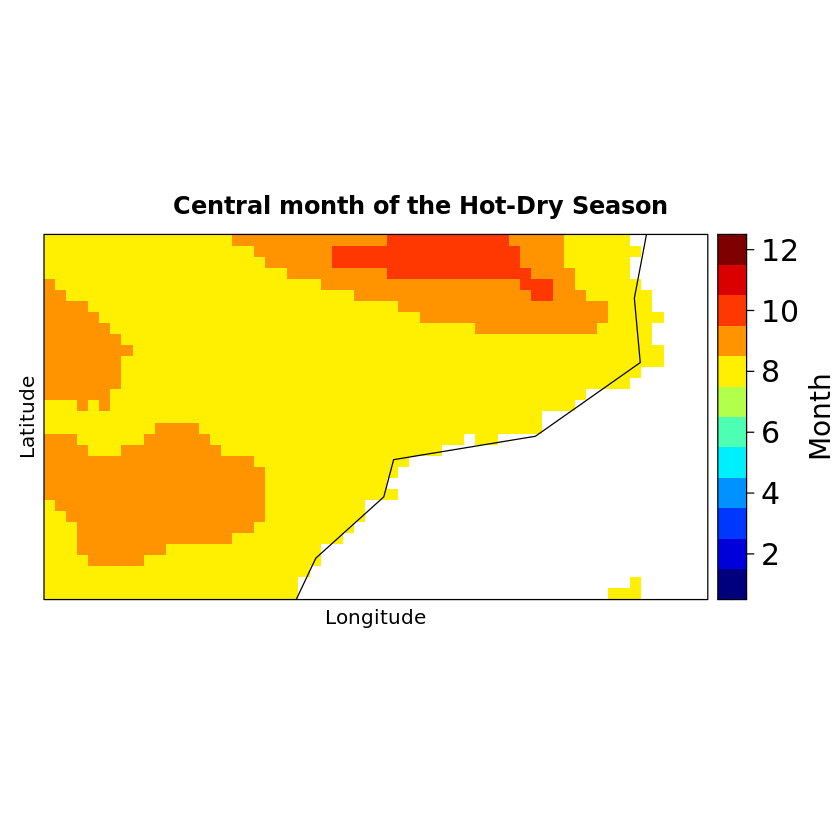

In [28]:
h.d <- hottest.month
h.d$Data <- hottest.month$Data[2,,]
attr(h.d$Data, "dimensions") <- c("lat", "lon")

spatialPlot(h.d, backdrop.theme = "coastline", 
            main=paste0("Central month of the Hot-Dry Season"), 
            color.theme="jet.colors", set.min=0.5, set.max=12.5, at=seq(0.5,12.5,1),
            xlab="Longitude", ylab="Latitude",
            colorkey = list(space = "right",
                            title = list("Month", cex = 1.4),
                            labels = list(cex = 1.5)))


In [29]:
# Procesamiento
source("functions/fun.transform.data.R")
pr.tf <- transform.data(pr, hottest.month)
tmax.tf <- transform.data(tasmax, hottest.month)
print("Transformed data: Done")

# Cuantiles históricos
source("functions/fun.quantiles.h-d.season.R")
pr.q50 <- fun.quantiles(pr.tf, var = "pr", quantile = 0.5)
tmax.q90 <- fun.quantiles(tmax.tf, var = "tmax", quantile = 0.9)
print("Quantiles: Done")

# Binarización y máscara
pr.monthly <- aggregateGrid(pr.tf, aggr.y = list(FUN = "sum", na.rm = TRUE))
# pr.monthly$Dates$start <- as.Date(c(1986:2005))
pr.mask <- list()
for (i in 1:dim(pr.monthly$Data)[which(attr(pr.monthly$Data, "dimensions") == "time")]){
  pr.year <- subsetGrid(pr.monthly, years = years[i])
  pr.masked <- gridArithmetics(pr.year, mask, operator = "*")
  pr.mask[[i]] <- pr.masked
}
pr.monthly.masked <- redim(do.call(bindGrid, c(pr.mask, list(dimension = "time", skip.temporal.check = TRUE))), drop = TRUE)

source("functions/fun.binarization.h-d.season.R")
pr.bin <- fun.binarization(dataset = pr.monthly.masked, hottest.month = hottest.month, quantile = pr.q50, var = "pr", milimetros)
# saveRDS(pr.bin, paste0(path, "pr.bin.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")
tmax.bin <- fun.binarization(dataset = tmax.tf, hottest.month = hottest.month, quantile = tmax.q90, var = "tmax", milimetros)
# saveRDS(tmax.bin, paste0(path, "tmax.bin.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")
print("Binarization: Done")


[1] "Transformed data: Done"


[2025-11-14 09:56:32] Performing annual aggregation...

[2025-11-14 09:56:33] Done.

[2025-11-14 09:56:33] - Computing climatology...

[2025-11-14 09:56:33] - Done.

[2025-11-14 09:56:33] - Computing climatology...

[2025-11-14 09:56:34] - Done.



[1] "Quantiles: Done"


[2025-11-14 09:56:34] Performing annual aggregation...

[2025-11-14 09:56:35] Done.



[1] "i = 1"
[1] "i = 2"
[1] "i = 3"
[1] "i = 4"
[1] "i = 5"
[1] "i = 6"
[1] "i = 7"
[1] "i = 8"
[1] "i = 9"
[1] "i = 10"
[1] "i = 11"
[1] "i = 12"
[1] "i = 13"
[1] "i = 14"
[1] "i = 15"
[1] "i = 16"
[1] "i = 17"
[1] "i = 18"
[1] "i = 19"
[1] "i = 20"
[1] "i = 21"
[1] "i = 22"
[1] "i = 23"
[1] "i = 24"
[1] "i = 25"
[1] "i = 26"
[1] "i = 27"
[1] "i = 28"
[1] "i = 29"
[1] "i = 30"
[1] "i = 31"
[1] "i = 32"
[1] "i = 33"
[1] "Binarization: Done"


In [30]:
# Frecuencia
source("functions/fun.ce.frecuency.h-d.season.R")
frecuency <- fun.ce.frecuency(hottest.month = hottest.month, tmax.bin = tmax.bin, pr.bin = pr.bin)
# saveRDS(frecuency, paste0(path, "ce.frecuency.era5-land.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")

print("Frecuency: Done")

[1] "i=  1"
[1] "i=  2"
[1] "i=  3"
[1] "i=  4"
[1] "i=  5"
[1] "i=  6"
[1] "i=  7"
[1] "i=  8"
[1] "i=  9"
[1] "i=  10"
[1] "i=  11"
[1] "i=  12"
[1] "i=  13"
[1] "i=  14"
[1] "i=  15"
[1] "i=  16"
[1] "i=  17"
[1] "i=  18"
[1] "i=  19"
[1] "i=  20"
[1] "i=  21"
[1] "i=  22"
[1] "i=  23"
[1] "i=  24"
[1] "i=  25"
[1] "i=  26"
[1] "i=  27"
[1] "i=  28"
[1] "i=  29"
[1] "i=  30"
[1] "i=  31"
[1] "i=  32"
[1] "i=  33"
[1] "Frecuency: Done"


[2025-11-14 10:00:15] Performing annual aggregation...

[2025-11-14 10:00:16] Done.

[2025-11-14 10:00:16] - Computing climatology...

[2025-11-14 10:00:16] - Done.



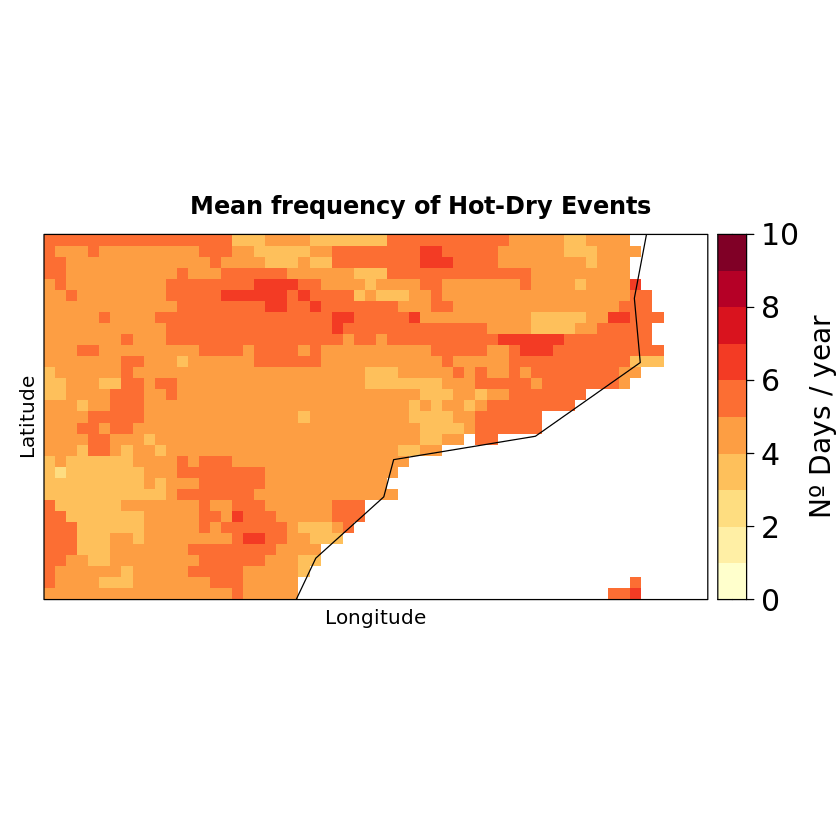

In [31]:
# Pintamos la frecuencia media
frecuency.mean <- aggregateGrid(frecuency, aggr.y = list(FUN = "sum", na.rm = TRUE))
frequency.mean <- climatology(frecuency.mean)
frequency.mean <- gridArithmetics(frequency.mean, mask, operator="*")

spatialPlot(frequency.mean, backdrop.theme = "coastline", 
            main=paste0("Mean frequency of Hot-Dry Events"), 
            color.theme="YlOrRd", set.min=0, set.max=10, at=seq(0,10,1),
            xlab="Longitude", ylab="Latitude",
            colorkey = list(space = "right",
                            title = list("Nº Days / year", cex = 1.4),
                            labels = list(cex = 1.5)))


In [32]:
# Duración
source("functions/fun.duration.h-d.season.R")
racha <- 2
duration <- fun.duration(frecuency, hottest.month, racha, years)
# saveRDS(duration, paste0(path, "ce.duration.era5-land.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")

print("Duration: Done")

[1] "i=  1"


[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Computing climatology...

[2025-11-14 10:01:00] - Done.

[2025-11-14 10:01:00] - Comp

[1] "i=  2"


[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:08] - Computing climatology...

[2025-11-14 10:01:08] - Done.

[2025-11-14 10:01:09] - Computing climatology...

[2025-11-14 10:01:09] - Done.

[2025-11-14 10:01:09] - Computing climatology...

[2025-11-14 10:01:09] - Done.

[2025-11-14 10:01:09] - Comp

[1] "i=  3"


[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Computing climatology...

[2025-11-14 10:01:17] - Done.

[2025-11-14 10:01:17] - Comp

[1] "i=  4"


[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Computing climatology...

[2025-11-14 10:01:25] - Done.

[2025-11-14 10:01:25] - Comp

[1] "i=  5"


[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Computing climatology...

[2025-11-14 10:01:33] - Done.

[2025-11-14 10:01:33] - Comp

[1] "i=  6"


[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Computing climatology...

[2025-11-14 10:01:41] - Done.

[2025-11-14 10:01:41] - Comp

[1] "i=  7"


[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Computing climatology...

[2025-11-14 10:01:50] - Done.

[2025-11-14 10:01:50] - Comp

[1] "i=  8"


[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Computing climatology...

[2025-11-14 10:01:59] - Done.

[2025-11-14 10:01:59] - Comp

[1] "i=  9"


[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Computing climatology...

[2025-11-14 10:02:10] - Done.

[2025-11-14 10:02:10] - Comp

[1] "i=  10"


[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:19] - Computing climatology...

[2025-11-14 10:02:19] - Done.

[2025-11-14 10:02:20] - Computing climatology...

[2025-11-14 10:02:20] - Done.

[2025-11-14 10:02:20] - Computing climatology...

[2025-11-14 10:02:20] - Done.

[2025-11-14 10:02:20] - Computing climatology...

[2025-11-14 10:02:20] - Done.

[2025-11-14 10:02:20] - Computing climatology...

[2025-11-14 10:02:20] - Done.

[2025-11-14 10:02:20] - Computing climatology...

[2025-11-14 10:02:20] - Done.

[2025-11-14 10:02:20] - Comp

[1] "i=  11"


[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Computing climatology...

[2025-11-14 10:02:30] - Done.

[2025-11-14 10:02:30] - Comp

[1] "i=  12"


[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Computing climatology...

[2025-11-14 10:02:40] - Done.

[2025-11-14 10:02:40] - Comp

[1] "i=  13"


[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Computing climatology...

[2025-11-14 10:02:51] - Done.

[2025-11-14 10:02:51] - Comp

[1] "i=  14"


[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Computing climatology...

[2025-11-14 10:03:02] - Done.

[2025-11-14 10:03:02] - Comp

[1] "i=  15"


[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Computing climatology...

[2025-11-14 10:03:14] - Done.

[2025-11-14 10:03:14] - Comp

[1] "i=  16"


[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:29] - Done.

[2025-11-14 10:03:29] - Computing climatology...

[2025-11-14 10:03:30] - Done.

[2025-11-14 10:03:30] - Computing climatology...

[2025-11-14 10:03:30] - Done.

[2025-11-14 10:03:30] - Computing climatology...

[2025-11-14 10:03:30] - Done.

[2025-11-14 10:03:30] - Computing climatology...

[2025-11-14 10:03:30] - Done.

[2025-11-14 10:03:30] - Computing climatology...

[2025-11-14 10:03:30] - Done.

[2025-11-14 10:03:30] - Comp

[1] "i=  17"


[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Computing climatology...

[2025-11-14 10:03:44] - Done.

[2025-11-14 10:03:44] - Comp

[1] "i=  18"


[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Computing climatology...

[2025-11-14 10:04:00] - Done.

[2025-11-14 10:04:00] - Comp

[1] "i=  19"


[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Computing climatology...

[2025-11-14 10:04:16] - Done.

[2025-11-14 10:04:16] - Comp

[1] "i=  20"


[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Computing climatology...

[2025-11-14 10:04:33] - Done.

[2025-11-14 10:04:33] - Comp

[1] "i=  21"


[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Computing climatology...

[2025-11-14 10:04:52] - Done.

[2025-11-14 10:04:52] - Comp

[1] "i=  22"


[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Computing climatology...

[2025-11-14 10:05:11] - Done.

[2025-11-14 10:05:11] - Comp

[1] "i=  23"


[2025-11-14 10:05:30] - Computing climatology...

[2025-11-14 10:05:30] - Done.

[2025-11-14 10:05:30] - Computing climatology...

[2025-11-14 10:05:30] - Done.

[2025-11-14 10:05:30] - Computing climatology...

[2025-11-14 10:05:30] - Done.

[2025-11-14 10:05:30] - Computing climatology...

[2025-11-14 10:05:30] - Done.

[2025-11-14 10:05:30] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Computing climatology...

[2025-11-14 10:05:31] - Done.

[2025-11-14 10:05:31] - Comp

[1] "i=  24"


[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Computing climatology...

[2025-11-14 10:05:51] - Done.

[2025-11-14 10:05:51] - Comp

[1] "i=  25"


[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Computing climatology...

[2025-11-14 10:06:12] - Done.

[2025-11-14 10:06:12] - Comp

[1] "i=  26"


[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Computing climatology...

[2025-11-14 10:06:33] - Done.

[2025-11-14 10:06:33] - Comp

[1] "i=  27"


[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Computing climatology...

[2025-11-14 10:06:55] - Done.

[2025-11-14 10:06:55] - Comp

[1] "i=  28"


[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Computing climatology...

[2025-11-14 10:07:16] - Done.

[2025-11-14 10:07:16] - Comp

[1] "i=  29"


[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Computing climatology...

[2025-11-14 10:07:36] - Done.

[2025-11-14 10:07:36] - Comp

[1] "i=  30"


[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:56] - Done.

[2025-11-14 10:07:56] - Computing climatology...

[2025-11-14 10:07:57] - Done.

[2025-11-14 10:07:57] - Computing climatology...

[2025-11-14 10:07:57] - Done.

[2025-11-14 10:07:57] - Computing climatology...

[2025-11-14 10:07:57] - Done.

[2025-11-14 10:07:57] - Comp

[1] "i=  31"


[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Computing climatology...

[2025-11-14 10:08:18] - Done.

[2025-11-14 10:08:18] - Comp

[1] "i=  32"


[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Computing climatology...

[2025-11-14 10:08:33] - Done.

[2025-11-14 10:08:33] - Comp

[1] "i=  33"


[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Computing climatology...

[2025-11-14 10:08:48] - Done.

[2025-11-14 10:08:48] - Comp

[1] "Duration: Done"


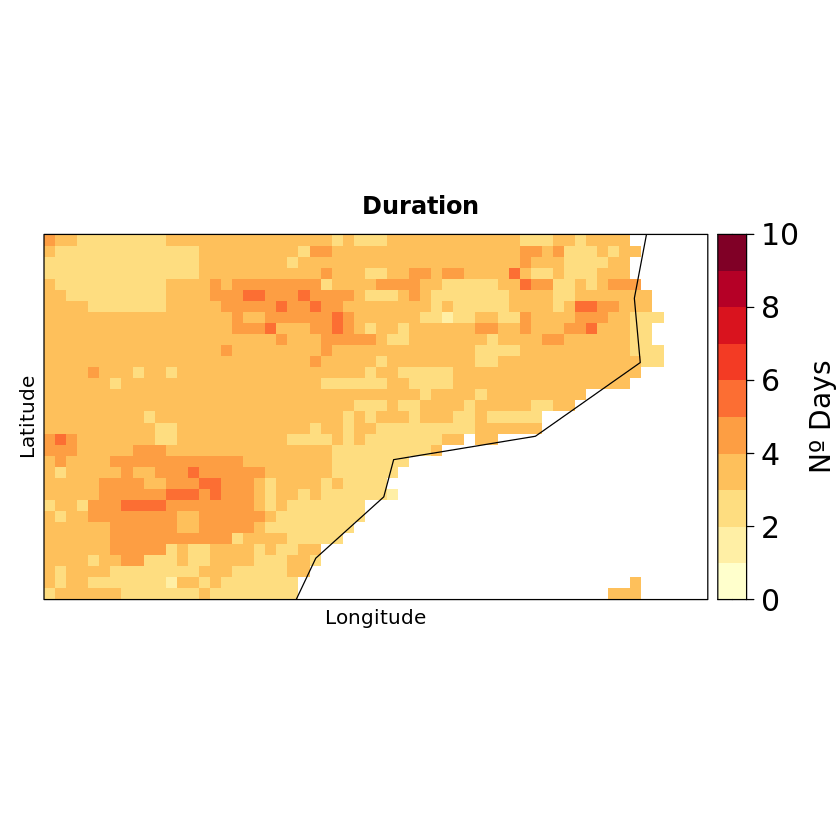

In [34]:
spatialPlot(duration, backdrop.theme = "coastline", 
            main=paste0("Duration"), 
            color.theme="YlOrRd", set.min=0, set.max=10, at=seq(0,10,1),
            xlab="Longitude", ylab="Latitude",
            colorkey = list(space = "right",
                            title = list("Nº Days", cex = 1.4),
                            labels = list(cex = 1.5)))

In [36]:
# Severidad
source("functions/fun.severity.h-d.season.R")
severity <- fun.severity(hottest.month, pr.obs = pr.tf, tmax.obs = tmax.tf, pr.daily = pr.tf, tmax.daily = tmax.tf)
# saveRDS(severity, paste0(path, "ce.severity.era5-land.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")

print("Severity: Done")


[2025-11-14 10:30:09] Performing annual aggregation...

[2025-11-14 10:30:10] Done.

[2025-11-14 10:30:10] Performing annual aggregation...

Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; retur

[1] "i=  1"
[1] "i=  2"
[1] "i=  3"
[1] "i=  4"
[1] "i=  5"
[1] "i=  6"
[1] "i=  7"
[1] "i=  8"
[1] "i=  9"
[1] "i=  10"
[1] "i=  11"
[1] "i=  12"
[1] "i=  13"
[1] "i=  14"
[1] "i=  15"
[1] "i=  16"
[1] "i=  17"
[1] "i=  18"
[1] "i=  19"
[1] "i=  20"
[1] "i=  21"
[1] "i=  22"
[1] "i=  23"
[1] "i=  24"
[1] "i=  25"
[1] "i=  26"
[1] "i=  27"
[1] "i=  28"
[1] "i=  29"
[1] "i=  30"
[1] "i=  31"
[1] "i=  32"
[1] "i=  33"
[1] "Severity: Done"


In [37]:

# Categorías
source("functions/fun.categories.h-d.season.R")
categories <- fun.categories(severity, hottest.month)
# saveRDS(categories, paste0(path, "ce.categories.era5-land.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")



[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Computing climatology...

[2025-11-14 10:30:58] - Done.

[2025-11-14 10:30:58] - Comp

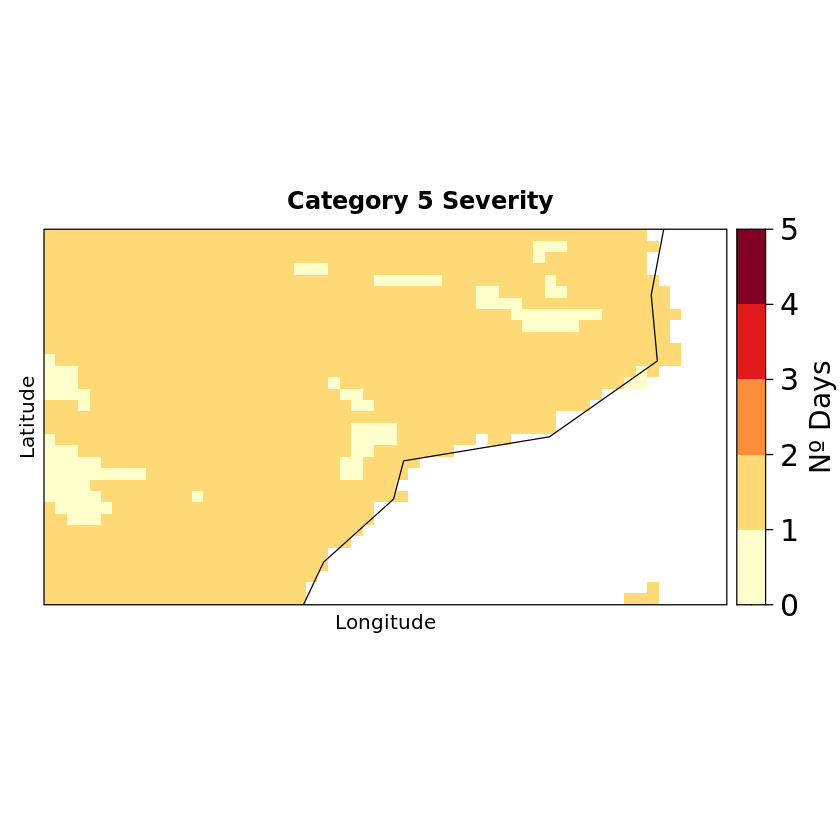

In [41]:
spatialPlot(categories$c5, backdrop.theme = "coastline", 
            main=paste0("Category 5 Severity"), 
            color.theme="YlOrRd", set.min=0, set.max=5, at=seq(0,5,1),
            xlab="Longitude", ylab="Latitude",
            colorkey = list(space = "right",
                            title = list("Nº Days", cex = 1.4),
                            labels = list(cex = 1.5)))

In [ ]:
# Intensidad
source("functions/fun.intensity.R")
intensity <- fun.intensity(hottest.month, pr.tf, tmax.tf, pr.tf, tmax.tf)
# saveRDS(severity, paste0(path, "ce.severity.era5-land.HOT.DRY.station.ventana.movil.", year.range, ".", region, ".rds"), compress = "xz")
print("Intensity: Done")


[2025-11-14 10:40:21] - Computing climatology...

[2025-11-14 10:40:22] - Done.

[2025-11-14 10:40:22] - Computing climatology...

[2025-11-14 10:40:22] - Done.



[1] "i=  1"
[1] "i=  2"
[1] "i=  3"
[1] "i=  4"
[1] "i=  5"
[1] "i=  6"
[1] "i=  7"
[1] "i=  8"
[1] "i=  9"
[1] "i=  10"
[1] "i=  11"
[1] "i=  12"
[1] "i=  13"
[1] "i=  14"
[1] "i=  15"
[1] "i=  16"
[1] "i=  17"
[1] "i=  18"
[1] "i=  19"
[1] "i=  20"
[1] "i=  21"
[1] "i=  22"
[1] "i=  23"
[1] "i=  24"
[1] "i=  25"
[1] "i=  26"
[1] "i=  27"
[1] "i=  28"
[1] "i=  29"
[1] "i=  30"
[1] "i=  31"
[1] "i=  32"
[1] "i=  33"
[1] "Severity: Done"


: 

In [ ]:
# Categorías Intensidad
source("functions/fun.categories.intensity_mean.R")
categories.intensity_mean <- fun.categories.intesity_mean(intensity, hottest.month)
